In [110]:
#imports
import pandas as pd
from nltk.cluster.kmeans import KMeansClusterer
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, DBSCAN, OPTICS
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from nltk.cluster.util import euclidean_distance
from sklearn.datasets import load_breast_cancer, load_wine

In [111]:
# mnhtn dist
def manhattan_distance(x, y):
  return np.abs(x - y).sum()

In [112]:
# def euclidean_distance(x, y):
#   return metrics.pairwise_distances(x, y, metric='euclidean')

In [113]:
#kmeans
def kmeans(X, NUM_CLUSTERS, distance):
  kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=distance , repeats=25)
  yk = kclusterer.cluster(X, assign_clusters=True)
  return yk, np.array(kclusterer.means())

In [114]:
def agglomerative(X, clusters, distance):
  model = AgglomerativeClustering(n_clusters=clusters, affinity=distance)
  model.fit(X)
  return model.labels_

In [115]:
# Hierarchy 

In [116]:
# Non hierarchy 

Evaluation of clustering using V-measure, Completeness, Fowlkes-Mallows scores and Homogenity

In [117]:
datasets_names = ['1', '2', '3', '4', 'breast cancer', 'wine quality']
metrics_names = ['V-mesure', ' Completeness', 'Fowlkes-Mallow', 'Homogenity' ]
# Mericts
def calculateSingleMetrics( y_true, y_pred):
  return [metrics.v_measure_score(y_true, y_pred), metrics.completeness_score(y_true, y_pred), metrics.fowlkes_mallows_score(y_true, y_pred), metrics.homogeneity_score(y_true, y_pred)]


def calculateAll(raw_data):
  
  # y_true is [] of some dataset and metric pair result of particular method
  data = [ calculateSingleMetrics(y_true, y_pred) for (y_true, y_pred) in raw_data ]
  data
  return pd.DataFrame(data=data, columns=metrics_names, index=datasets_names)

In [118]:
# Clusterization visualisation
def display_clusterisation(X, y, centers, dataset_name, labels):
  cmap_bold  = ListedColormap(['#FBB000', '#00FF00', '#0000AF', '#000CFC', '#0BB000', '#B0000C'])
  X= X[:,:2]
  plt.scatter(X[:,0], X[:,1], c = y , cmap = 'viridis', edgecolors='black')
  plt.scatter(centers[:,0], centers[:,1], s = 80, color='red')
  plt.title(f'Dataset: {dataset_name}')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

In [119]:
# Data visualisation
def data_visualisation(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
  plt.show()

In [120]:
# Table to compare


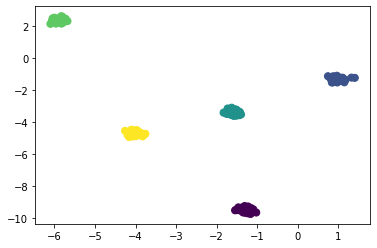

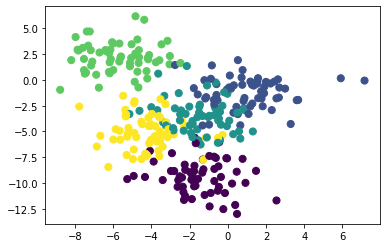

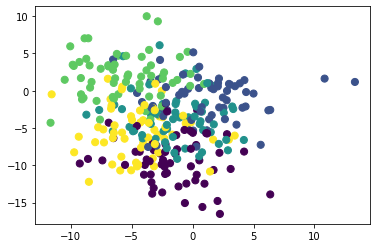

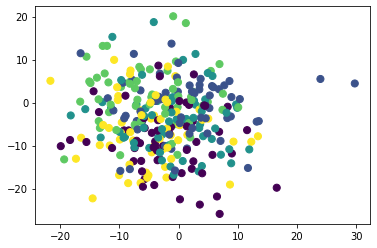

In [121]:
# Datasets creation
def create_data_set(cluster_std=0.5, centers=4, n_features=2):
  return make_blobs(n_samples=300, centers=centers,
                       cluster_std=cluster_std, random_state=2)
# Synthetic Data
synthetic_data = [
                  create_data_set(0.1, 5, 4), #
                  create_data_set(1.5, 5, 4), #
                  create_data_set(3, 5, 4), #
                  create_data_set(7, 5, 4), #
]

for (X, y) in synthetic_data:
  data_visualisation(X, y)

In [122]:
data = load_breast_cancer()
X = data.data
y = data.target
synthetic_data.append((X,y))

In [123]:
data = load_wine()
X = data.data
y = data.target
synthetic_data.append((X,y))

# K-Means and Euclidean distance

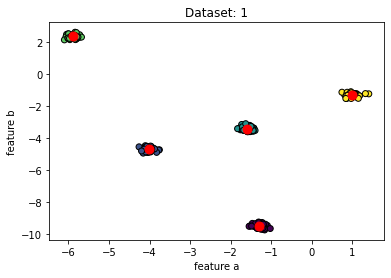

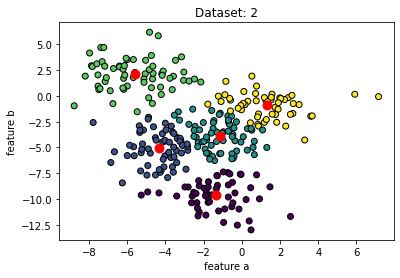

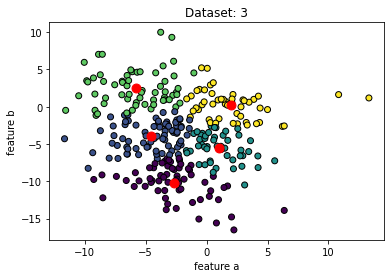

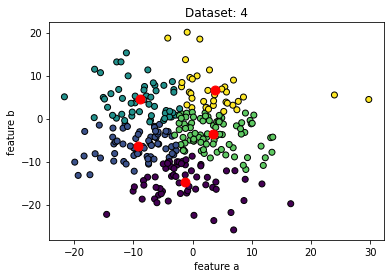

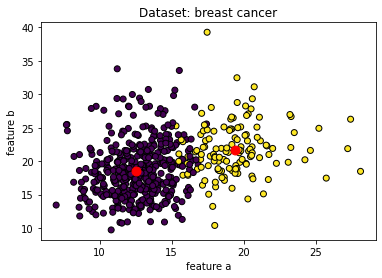

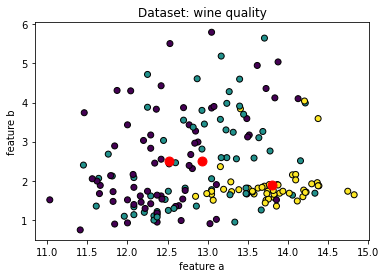

In [124]:
kmeans_euclidean_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  clusters = len(set(y))
  y_pred, means = kmeans(X, clusters, euclidean_distance)
  kmeans_euclidean_data.append([y, y_pred])
  display_clusterisation(X, y_pred, means, datasets_names[i], ['feature a', 'feature b'])


In [125]:
calculateAll(kmeans_euclidean_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.697264,0.698022,0.735169,0.696509
3,0.334806,0.336139,0.419486,0.333483
4,0.085819,0.086763,0.239931,0.084895
breast cancer,0.464793,0.516809,0.791517,0.422291
wine quality,0.428757,0.428701,0.583537,0.428812


# K-Means and Manhattan distance

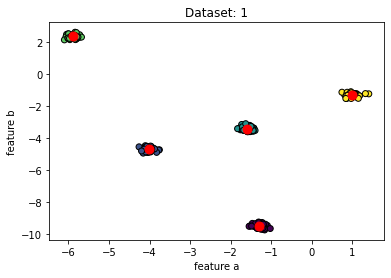

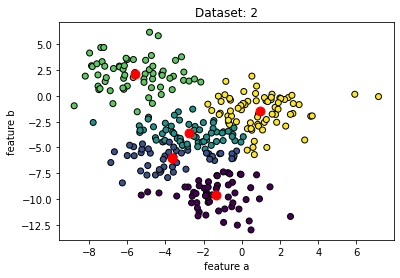

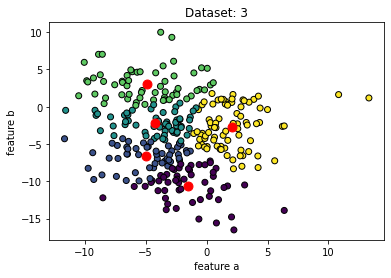

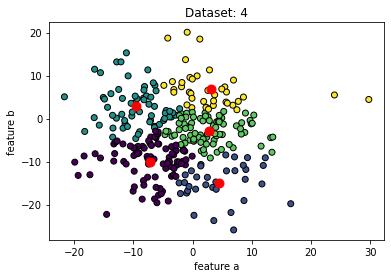

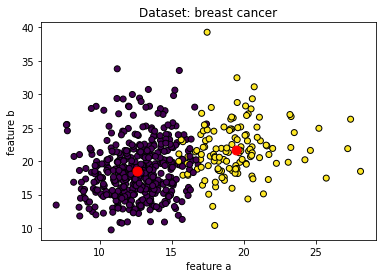

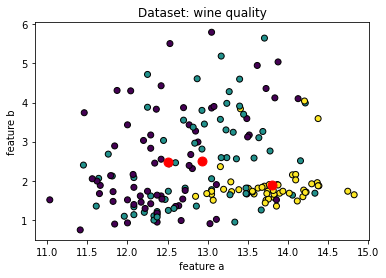

In [127]:
kmeans_manhattan_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  clusters = len(set(y))
  y_pred, means = kmeans(X, clusters, manhattan_distance)
  kmeans_manhattan_data.append([y, y_pred])
  display_clusterisation(X, y_pred, means, datasets_names[i], ['feature a', 'feature b'])

In [128]:
calculateAll(kmeans_manhattan_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.702539,0.704280,0.723372,0.700807
3,0.283060,0.284128,0.385573,0.282000
4,0.083733,0.085383,0.245858,0.082146
breast cancer,0.456708,0.510052,0.788211,0.413465
wine quality,0.431543,0.431385,0.585935,0.431701


# Agglomerative and Euclidean

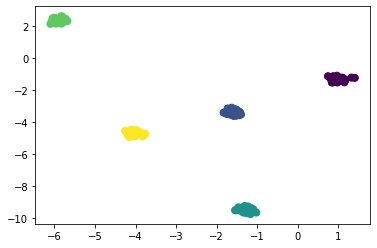

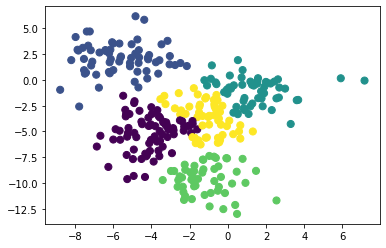

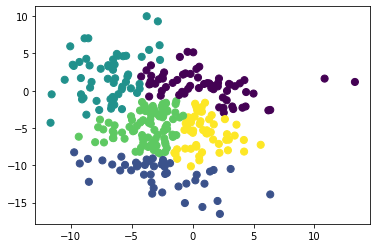

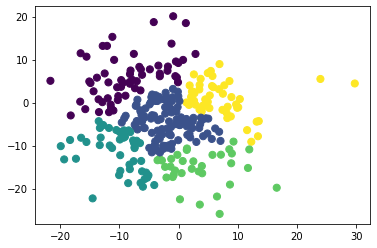

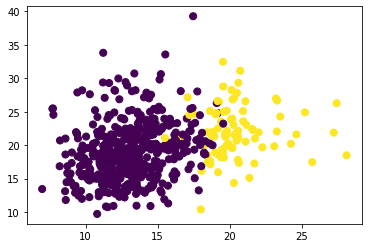

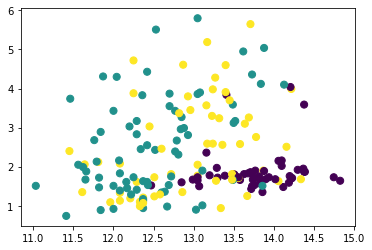

In [129]:
agglo_euc_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  clusters = len(set(y))
  y_pred = agglomerative(X, clusters, 'euclidean')
  agglo_euc_data.append([y, y_pred])
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
  plt.show()

In [130]:
calculateAll(agglo_euc_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.675832,0.678153,0.709681,0.673526
3,0.321083,0.323531,0.384739,0.318672
4,0.083009,0.085219,0.246371,0.080912
breast cancer,0.319082,0.407601,0.739228,0.262150
wine quality,0.416077,0.416293,0.582122,0.415861


# Agglomerative and Manhattan 

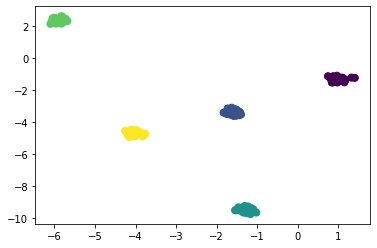

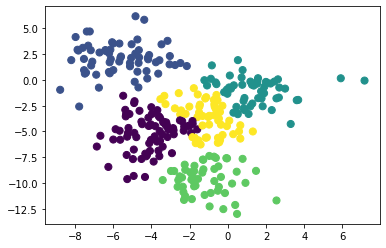

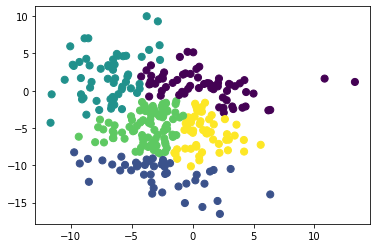

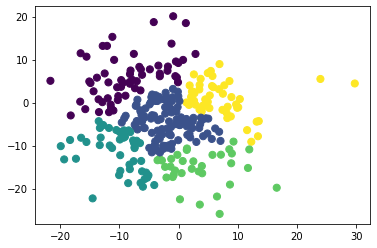

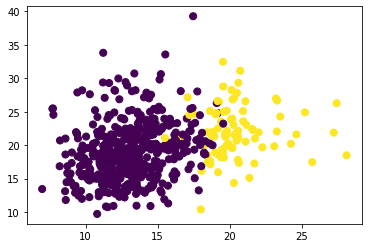

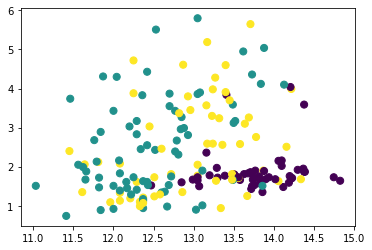

In [131]:
agglo_man_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  clusters = len(set(y))
  y_pred = agglomerative(X, clusters, 'euclidean')
  agglo_man_data.append([y, y_pred])
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
  plt.show()

In [132]:
calculateAll(agglo_man_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.675832,0.678153,0.709681,0.673526
3,0.321083,0.323531,0.384739,0.318672
4,0.083009,0.085219,0.246371,0.080912
breast cancer,0.319082,0.407601,0.739228,0.262150
wine quality,0.416077,0.416293,0.582122,0.415861


# OPTICS and Euclidean

In [133]:
min_samples = [20, 8, 4 , 2, 10, 2]

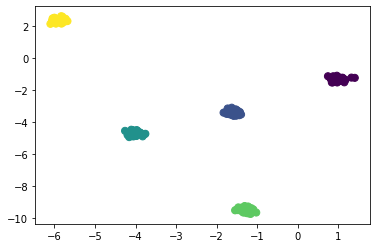

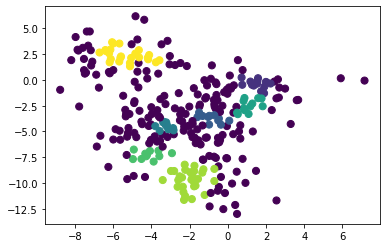

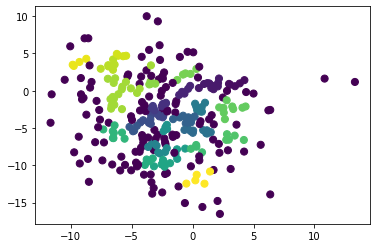

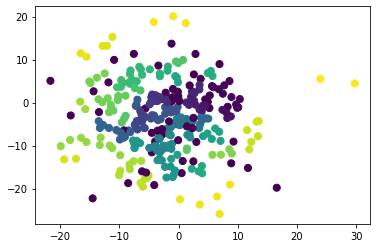

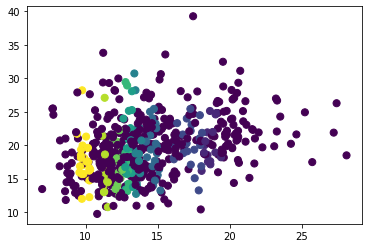

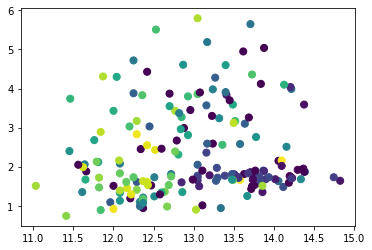

In [134]:
optics_euc_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  model = OPTICS(min_samples=min_samples[i], metric='euclidean').fit(X)
  y_pred = model.labels_
  optics_euc_data.append([y, y_pred])
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
  plt.show()

In [135]:
calculateAll(optics_euc_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.356688,0.389988,0.346776,0.328627
3,0.219430,0.179449,0.215799,0.282332
4,0.249568,0.174175,0.096249,0.440045
breast cancer,0.154971,0.117049,0.493887,0.229242
wine quality,0.276606,0.180435,0.152288,0.592305


# OPTICS and Manhattan

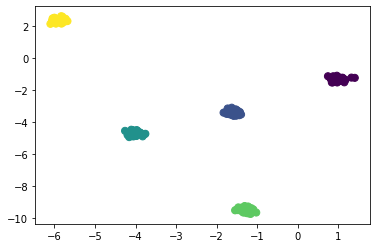

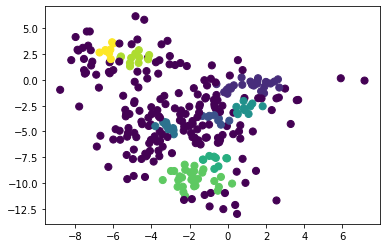

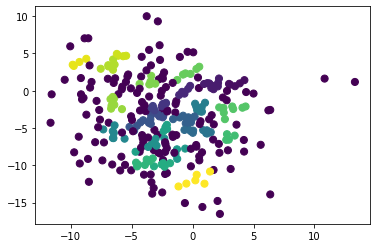

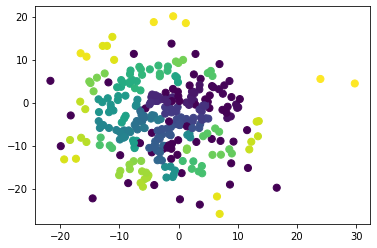

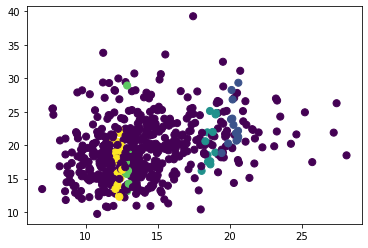

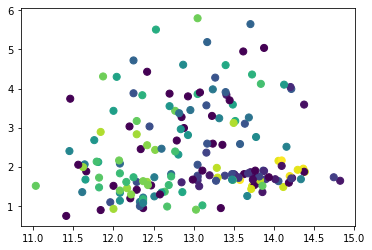

In [136]:
optics_man_data = []
for i, data in enumerate(synthetic_data):
  X, y = data
  model = OPTICS(min_samples=min_samples[i], metric='manhattan').fit(X)
  y_pred = model.labels_
  optics_man_data.append([y, y_pred])
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
  plt.show()

In [137]:
calculateAll(optics_man_data)

,V-mesure,Completeness,Fowlkes-Mallow,Homogenity
1,1.000000,1.000000,1.000000,1.000000
2,0.358768,0.389889,0.356059,0.332248
3,0.203824,0.171729,0.232271,0.250673
4,0.243216,0.170108,0.092205,0.426524
breast cancer,0.130749,0.154482,0.659543,0.113337
wine quality,0.303906,0.198218,0.159531,0.651029
